In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics  
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.tree import export_graphviz
from IPython.display import Image  
#import pydotplus
from sklearn.naive_bayes import CategoricalNB, ComplementNB, MultinomialNB 
from sklearn import svm
from scipy import stats 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from pprint import pprint
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import AdaBoostClassifier
from itertools import combinations 

# My Import
from datetime import date
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics  
from sklearn.model_selection import KFold
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
import math

In [6]:
data_frame = pd.read_csv('.\marketing_campaign_train_new2.csv', index_col=0)
data_frame.head()

,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,Mnt_Meat,Mnt_sweet,...,Complain_upd,Num_Web_Visits_upd,Age_upd,Age_norm_upd,Mnt_Meat_min_max_upd,Mnt_Fruits_min_max_upd,Mnt_sweet_min_max_upd,Mnt_Wines_min_max_upd,Mnt_Gold_Products_min_max_upd,Mnt_Fish_min_max_upd
ID,,,,,,,,,,,,,,,,,,,,,
5376,Graduation,Married,51983.0,1.0,0.0,06/01/2013,42,1.0,1.0,1725.0,...,0.0,2.0,43.0,-0.833997,0.005025,0.000670,1.000000,0.003861,0.003802,0.002762
6862,Graduation,Divorced,1730.0,0.0,0.0,18/05/2014,65,1.0,1.0,3.0,...,0.0,40.0,51.0,-0.163632,0.005025,0.000670,0.001160,0.003861,0.003802,0.002762
10749,Graduation,Single,8028.0,0.0,0.0,18/09/2012,62,73.0,18.0,66.0,...,0.0,38.0,31.0,-1.839544,0.090452,0.048895,0.037703,0.027027,0.045627,0.005525
238,2n Cycle,Together,67309.0,1.0,1.0,23/01/2013,76,515.0,47.0,181.0,...,0.0,14.0,55.0,0.171550,0.236181,0.344943,0.104408,0.575290,0.361217,0.262431
1501,PhD,Married,160803.0,0.0,0.0,04/08/2012,21,55.0,16.0,1622.0,...,0.0,0.0,40.0,-1.085384,0.080402,0.036839,0.940255,0.065637,0.011407,0.011050


# Data Representation

### we aim to change the data representation from catagorical to numeric

In [7]:
# Changing Status column to numeric values
data_frame['Status_num'] = 0
data_frame.loc[data_frame['Status'] == 'Alone', 'Status_num'] = 1
data_frame.loc[data_frame['Status'] == 'Single', 'Status_num'] = 2
data_frame.loc[data_frame['Status'] == 'Divorced', 'Status_num'] = 3
data_frame.loc[data_frame['Status'] == 'Married', 'Status_num'] = 4
data_frame.loc[data_frame['Status'] == 'Together', 'Status_num'] = 5
data_frame.loc[data_frame['Status'] == 'Widow', 'Status_num'] = 6

In [8]:
# Changing Education to numeric values
data_frame['Education_num'] = 0
data_frame.loc[data_frame['Education'] == 'Basic', 'Education_num'] = 1
data_frame.loc[data_frame['Education'] == 'Graduation', 'Education_num'] = 2
data_frame.loc[data_frame['Education'] == 'Master', 'Education_num'] = 3
data_frame.loc[data_frame['Education'] == '2n Cycle', 'Education_num'] = 4
data_frame.loc[data_frame['Education'] == 'PhD', 'Education_num'] = 5

### Dealing with Nan values

In [9]:
# Changing Education to numeric values
#data_frame['num_kids'] = -1
#data_frame.loc[data_frame['Num_of_kids'] == '0', 'num_kids'] = 0
#data_frame.loc[data_frame['Num_of_kids'] == '1', 'num_kids'] = 1
#data_frame.loc[data_frame['Num_of_kids'] == '2', 'num_kids'] = 2
#data_frame.loc[data_frame['Num_of_kids'] == '3', 'num_kids'] = 3
#data_frame.loc[data_frame['Num_of_kids'] == '4', 'num_kids'] = 4


In [10]:
# Changing Education to numeric values
#data_frame['num_teen'] = -1
#data_frame.loc[data_frame['Num_of_Teen'] == '0', 'num_teen'] = 0
#data_frame.loc[data_frame['Num_of_Teen'] == '1', 'num_teen'] = 1
#data_frame.loc[data_frame['Num_of_Teen'] == '2', 'num_teen'] = 2
#data_frame.loc[data_frame['Num_of_Teen'] == '3', 'num_teen'] = 3
#data_frame.loc[data_frame['Num_of_Teen'] == '4', 'num_teen'] = 4

In [11]:
data_frame['Income_min_max'] = data_frame['Income_min_max'].fillna(0.075577)
print (data_frame[["Num_Web_Visits_upd"]].describe())
data_frame['Num_Web_Visits_upd'] = data_frame['Num_Web_Visits_upd'].fillna(10)
print (data_frame[["Num_Web_Purchases"]].describe())
data_frame['Num_Web_Purchases'] = data_frame['Num_Web_Purchases'].fillna(2)
print (data_frame[["Num_Store_Purchases"]].describe())
data_frame['Num_Store_Purchases'] = data_frame['Num_Web_Purchases'].fillna(4)
print (data_frame[["Num_Deals_Purchases"]].describe())
data_frame['Num_Deals_Purchases'] = data_frame['Num_Web_Purchases'].fillna(3)
print (data_frame[["Num_Catalog_Purchases"]].describe())
data_frame['Num_Catalog_Purchases'] = data_frame['Num_Catalog_Purchases'].fillna(6)
print (data_frame[["Num_of_kids"]].describe())
data_frame['Num_of_kids'] = data_frame['Num_of_kids'].fillna(0)
#print (data_frame[["Num_of_Teen"]].describe())
data_frame['Num_of_Teen'] = data_frame['Num_of_Teen'].fillna(0)

       Num_Web_Visits_upd
count         1680.000000
mean            10.600000
std              5.019865
min              0.000000
25%              6.000000
50%             12.000000
75%             14.000000
max             40.000000
       Num_Web_Purchases
count        1651.000000
mean            2.360388
std             1.974469
min             0.000000
25%             1.000000
50%             2.000000
75%             3.000000
max            15.000000
       Num_Store_Purchases
count          1673.000000
mean              4.101614
std               2.855441
min               0.000000
25%               2.000000
50%               3.000000
75%               6.000000
max              27.000000
       Num_Deals_Purchases
count          1673.000000
mean              2.650329
std               3.022488
min               0.000000
25%               0.000000
50%               2.000000
75%               4.000000
max              28.000000
       Num_Catalog_Purchases
count            1673.0000

In [14]:
#data_frame.to_csv('beforeTraining.csv')
X = data_frame[['Age_Bin', 'Status_num', 'Education_num', 'Income_min_max', 'Num_of_kids', 'Num_of_Teen', 'Recency', 'Num_Web_Visits_upd', 'Num_Web_Purchases', 'Num_Store_Purchases', 'Num_Deals_Purchases', 'Num_Catalog_Purchases','Mnt_Meat_min_max_upd','Mnt_Fruits_min_max_upd', 'Mnt_sweet_min_max_upd', 'Mnt_Fish_min_max_upd','Mnt_Gold_Products_min_max_upd','Mnt_Wines_min_max_upd', 'Complain_upd']]
y = data_frame['Response']

##  Splitting the Data 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Decision Tree classifier

#### Create Train and Predict

In [16]:
# Create Decision Tree classifer object
clf_tree = DecisionTreeClassifier(random_state=42) 

# Train Decision Tree Classifer 
clf_tree = clf_tree.fit(X_train,y_train)

# Predict the label
y_predict = clf_tree.predict(X_test)

### Results

In [17]:
# Acuuracy
print("accuracy=",metrics.accuracy_score(y_test, y_predict))
# sensitivity
print("sensitivity=",metrics.recall_score(y_test, y_predict))
# precision
print("precision=" ,metrics.precision_score(y_test, y_predict))
# confusion - Optional
pd.DataFrame(metrics.confusion_matrix(y_test, y_predict))

accuracy= 0.8115079365079365
sensitivity= 0.32142857142857145
precision= 0.4153846153846154


,0,1
0,382,38
1,57,27


## Decision Tree-Visualization

In [18]:
!pip install graphviz

You should consider upgrading via the 'd:\program files\python39\python.exe -m pip install --upgrade pip' command.


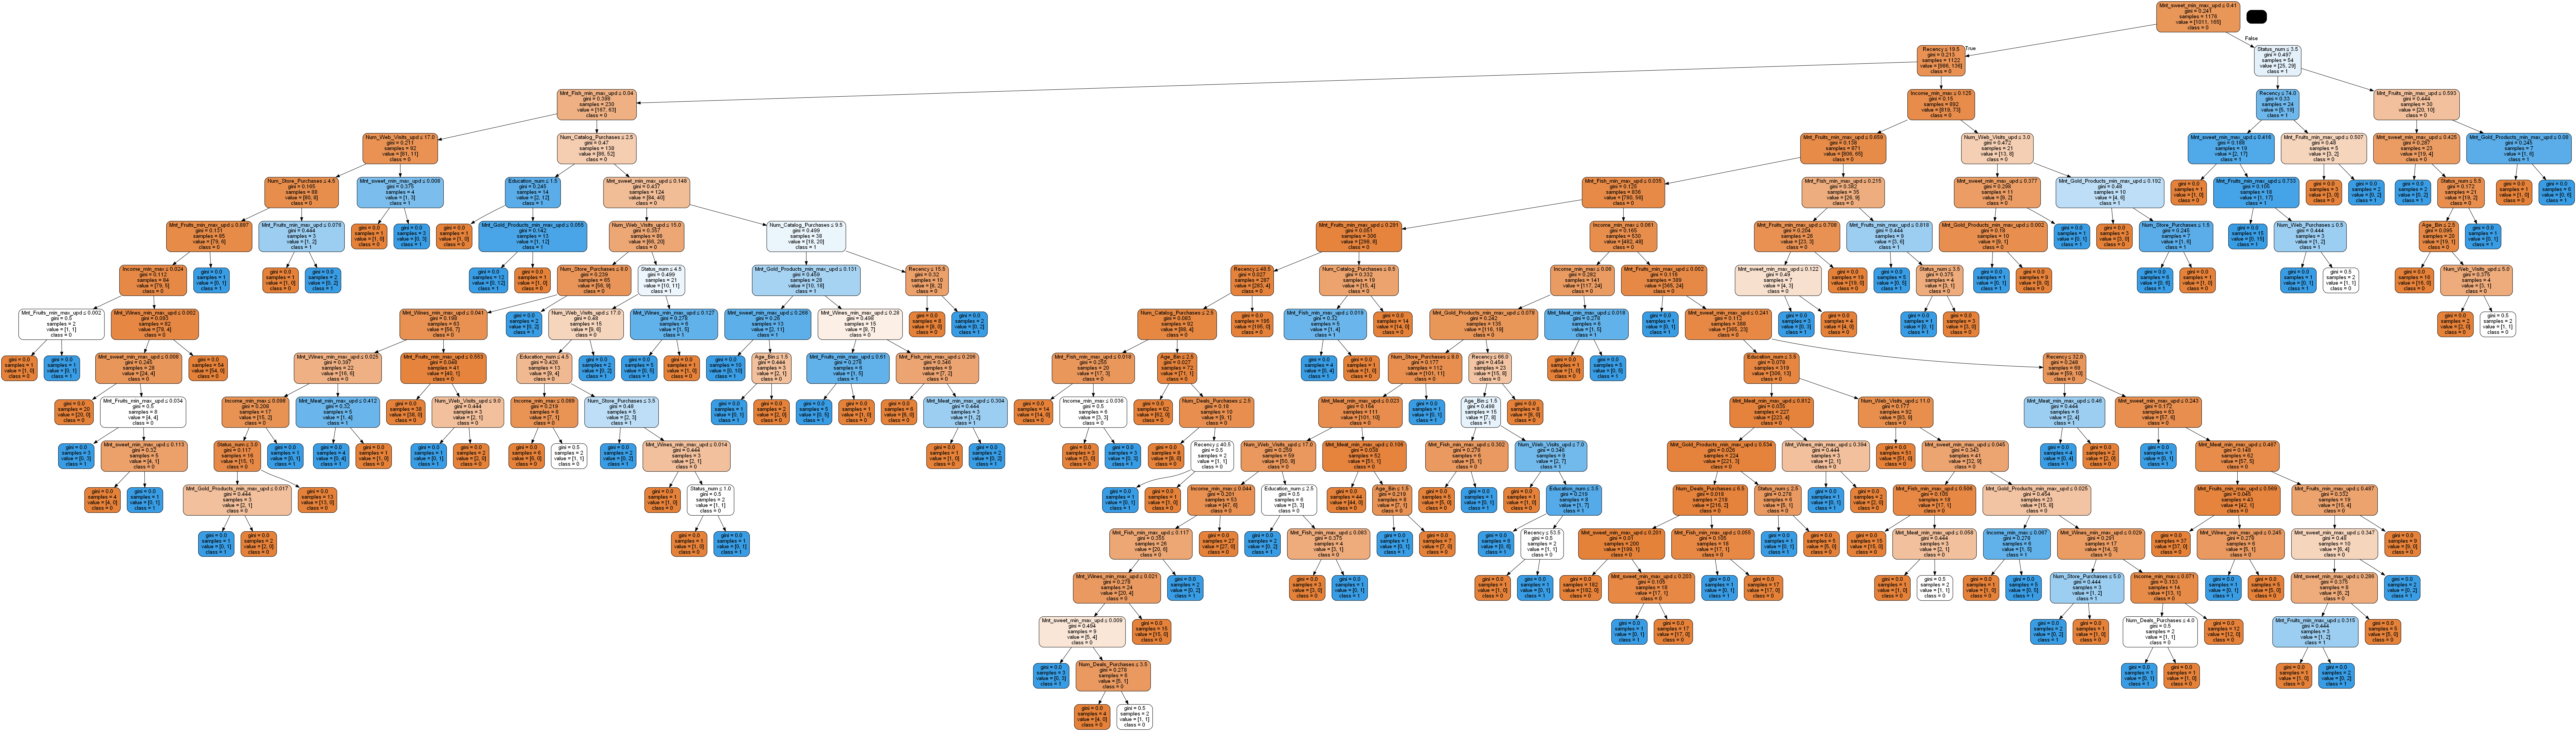

In [19]:
dot = export_graphviz(clf_tree, filled=True, rounded=True, 
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot)  
graph.write_png('tree3.png')
Image(graph.create_png())

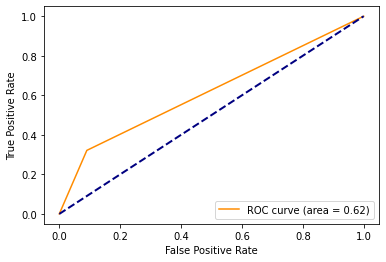

In [20]:
#decision tree - ROC
y_probs_tree = clf_tree.predict_proba(X_test) # probability prediction
fpr_tree, tpr_tree, _ = metrics.roc_curve(y_test, y_probs_tree[:,1])
auc_tree = metrics.auc(fpr_tree, tpr_tree)
plt.figure()
plt.plot(fpr_tree, tpr_tree, color='darkorange', label='ROC curve (area = %0.2f)' %  auc_tree)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

### Predict the labels for the train set

In [21]:
y_train_pred = clf_tree.predict(X_train)
print("accuracy=",metrics.accuracy_score(y_train, y_train_pred))
print("sensitivity=",metrics.recall_score(y_train, y_train_pred))
print("precision=" ,metrics.precision_score(y_train, y_train_pred))
pd.DataFrame(metrics.confusion_matrix(y_train, y_train_pred))

accuracy= 0.9957482993197279
sensitivity= 0.9696969696969697
precision= 1.0


,0,1
0,1011,0
1,5,160


In [22]:
#we can see the model is overfit due to the very high scores.

### Decision tree hyper parameters

In [23]:
#decision tree with random hyper parameters
max_depth = [3,5,8,10,15,20]
max_depth.append(None)
criterion = ['gini','entropy']
splitter = ['best', 'random']
min_samples_split = [10,50,75,100,125,200, 500]
min_samples_leaf = [1,5,10,20,50,100, 200, 500]
random_grid = {'criterion': criterion,
               'max_depth': max_depth,
               'splitter': splitter,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
pprint(random_grid)

{'criterion': ['gini', 'entropy'],
 'max_depth': [3, 5, 8, 10, 15, 20, None],
 'min_samples_leaf': [1, 5, 10, 20, 50, 100, 200, 500],
 'min_samples_split': [10, 50, 75, 100, 125, 200, 500],
 'splitter': ['best', 'random']}


In [24]:
#fitting the random parameters decision tree
random_tree = RandomizedSearchCV(estimator = clf_tree, param_distributions = random_grid, n_iter = 528, cv = 10,
                               verbose = 2, random_state = 42, n_jobs = -1)

random_tree.fit(X_train, y_train)

Fitting 10 folds for each of 528 candidates, totalling 5280 fits


RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=528, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 8, 10, 15, 20,
                                                      None],
                                        'min_samples_leaf': [1, 5, 10, 20, 50,
                                                             100, 200, 500],
                                        'min_samples_split': [10, 50, 75, 100,
                                                              125, 200, 500],
                                        'splitter': ['best', 'random']},
                   random_state=42, verbose=2)

In [25]:
#decision tree best hyper parameters 
random_tree.best_params_

{'splitter': 'random',
 'min_samples_split': 75,
 'min_samples_leaf': 1,
 'max_depth': 10,
 'criterion': 'gini'}

In [26]:
#prediction using the random_tree
y_pred = random_tree.predict(X_test)
print("accuracy=",metrics.accuracy_score(y_test, y_pred))
print("sensitivity=",metrics.recall_score(y_test, y_pred))
print("precision=" ,metrics.precision_score(y_test, y_pred))
pd.DataFrame(metrics.confusion_matrix(y_test, y_pred))

accuracy= 0.8412698412698413
sensitivity= 0.20238095238095238
precision= 0.5666666666666667


,0,1
0,407,13
1,67,17


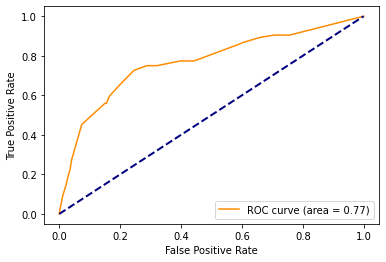

In [27]:
#decision tree with rando, parameters-ROC
y_probs_random_tree = random_tree.predict_proba(X_test) # probability prediction
fpr_random_tree, tpr_random_tree, _ = metrics.roc_curve(y_test, y_probs_random_tree[:,1])
auc_random_tree = metrics.auc(fpr_random_tree, tpr_random_tree)
plt.figure()
plt.plot(fpr_random_tree, tpr_random_tree, color='darkorange', label='ROC curve (area = %0.2f)' %  auc_random_tree)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [28]:
#checking overfitting 
y_train_pred = random_tree.predict(X_train)
print("accuracy=",metrics.accuracy_score(y_train, y_train_pred))
print("sensitivity=",metrics.recall_score(y_train, y_train_pred))
print("precision=" ,metrics.precision_score(y_train, y_train_pred))
pd.DataFrame(metrics.confusion_matrix(y_train, y_train_pred))

accuracy= 0.8732993197278912
sensitivity= 0.2727272727272727
precision= 0.6081081081081081


,0,1
0,982,29
1,120,45


### Decision tree Grid search

In [29]:
param_grid = {'splitter': ['best'],
 'min_samples_split': [10,50,75,100,125,200, 500],
 'min_samples_leaf': [1,5,10,20,50,100, 200, 500],
 'max_depth': [3,5,8,10,15,20],
 'criterion': ['gini', 'entropy']}

grid_search = GridSearchCV(estimator = clf_tree, param_grid = param_grid, cv = 10, n_jobs = -1, verbose = 2)

In [30]:
#fit
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 10 folds for each of 672 candidates, totalling 6720 fits


{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 50,
 'splitter': 'best'}

In [31]:
#prediction results
best_grid = grid_search.best_estimator_
best_grid.fit(X_train, y_train)
grid_y_pred = best_grid.predict(X_test)

print("accuracy=",metrics.accuracy_score(y_test, y_pred))
print("sensitivity=",metrics.recall_score(y_test, y_pred))
print("precision=" ,metrics.precision_score(y_test, y_pred))
pd.DataFrame(metrics.confusion_matrix(y_test, y_pred))
# grid_accuracy = metrics.accuracy_score(y_test, grid_y_pred)
# print('grid model accuracy = {:0.2f}%'.format(grid_accuracy*100))

accuracy= 0.8412698412698413
sensitivity= 0.20238095238095238
precision= 0.5666666666666667


,0,1
0,407,13
1,67,17


In [32]:
#looks like the model gives all  the time only 1 class prediction we will try different classifier

### Basic Random Forest

In [33]:
random_forest = RandomForestClassifier(random_state = 42)
random_forest = random_forest.fit(X_train,y_train)
y_pred = random_forest.predict(X_test)

print("accuracy=",metrics.accuracy_score(y_test, y_pred))
print("sensitivity=",metrics.recall_score(y_test, y_pred))
print("precision=" ,metrics.precision_score(y_test, y_pred))
pd.DataFrame(metrics.confusion_matrix(y_test, y_pred))

accuracy= 0.8531746031746031
sensitivity= 0.20238095238095238
precision= 0.7083333333333334


,0,1
0,413,7
1,67,17


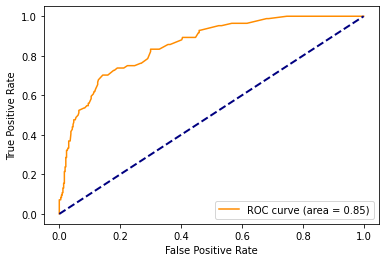

In [34]:
#Basic Random Forest-Roc
y_probs_RF = random_forest.predict_proba(X_test) # probability prediction
fpr_RF, tpr_RF, _ = metrics.roc_curve(y_test, y_probs_RF[:,1])
auc_RF = metrics.auc(fpr_RF, tpr_RF)
plt.figure()
plt.plot(fpr_RF, tpr_RF, color='darkorange', label='ROC curve (area = %0.2f)' %  auc_RF)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [35]:
#checking overfitting for the Basic Random Forest 
y_train_pred = random_forest.predict(X_train)
print("accuracy=",metrics.accuracy_score(y_train, y_train_pred))
print("sensitivity=",metrics.recall_score(y_train, y_train_pred))
print("precision=" ,metrics.precision_score(y_train, y_train_pred))
pd.DataFrame(metrics.confusion_matrix(y_train, y_train_pred))

accuracy= 0.9957482993197279
sensitivity= 0.9878787878787879
precision= 0.9819277108433735


,0,1
0,1008,3
1,2,163


In [36]:
#again we overfit

In [37]:
### Hyper Parameters-Random Forest

In [47]:
n_estimators = [100,200,400,600,800]

max_features = ['auto', 'log2', 2, 5, 8, 16, 19]

max_depth = [5, 10, 20, 40]
max_depth.append(None)

max_samples = [0.1, 0.3, 0.5, 0.7, 0.9]

criterion = ['gini','entropy']

min_samples_split = [5,10, 20,50,100]

min_samples_leaf = [1,5,10,20,50]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_samples': max_samples,
                'criterion': criterion,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
pprint(random_grid)
rf_random = RandomizedSearchCV(estimator = random_forest, param_distributions = random_grid, n_iter = 100, cv = 10,
                               verbose = 2, random_state = 42, n_jobs = -1)

{'criterion': ['gini', 'entropy'],
 'max_depth': [5, 10, 20, 40, None],
 'max_features': ['auto', 'log2', 2, 5, 8, 16, 19],
 'max_samples': [0.1, 0.3, 0.5, 0.7, 0.9],
 'min_samples_leaf': [1, 5, 10, 20, 50],
 'min_samples_split': [5, 10, 20, 50, 100],
 'n_estimators': [100, 200, 400, 600, 800]}


In [48]:
#fiting and looking on best params
rf_random.fit(X_train, y_train)
rf_random.best_params_


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_samples': 0.7,
 'max_features': 8,
 'max_depth': 10,
 'criterion': 'entropy'}

In [ ]:
#random forest hyper parameters - fit and predict 
best_random = rf_random.best_estimator_
random_y_pred = best_random.predict(X_test)
random_accuracy = metrics.accuracy_score(y_test, random_y_pred)
print('random model accuracy = {:0.2f}%'.format(random_accuracy*100))
print("random model sensitivity = {:0.2f}%".format(metrics.recall_score(y_test, random_y_pred)*100))
print("random model precision = {:0.2f}%".format(metrics.precision_score(y_test, random_y_pred)*100))

In [ ]:
#random forest hyper parameters-ROC
y_probs_rf_random = rf_random.predict_proba(X_test) # probability prediction
fpr_rf_random, tpr_rf_random, _ = metrics.roc_curve(y_test, y_probs_rf_random[:,1])
auc_rf_random = metrics.auc(fpr_rf_random, tpr_rf_random)
plt.figure()
plt.plot(fpr_rf_random, tpr_rf_random, color='darkorange', label='ROC curve (area = %0.2f)' %  auc_rf_random)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# SVM classifier

In [54]:
#fitting SVM Model
clf_svm = svm.SVC(kernel='rbf', C=0.9, probability=True)
clf_svm.fit(X_train, y_train)

#predict
y_pred = clf_svm.predict(X_test)

clf_svm_accuracy = metrics.accuracy_score(y_test, y_pred)
clf_svm_sensitivity = metrics.recall_score(y_test, y_pred)
clf_svm_precision = metrics.precision_score(y_test, y_pred)

print('base model accuracy = {:0.2f}%'.format(clf_svm_accuracy*100))
print('base model sensitivity = {:0.2f}%'.format(clf_svm_sensitivity*100))
print('base model precision = {:0.2f}%'.format(clf_svm_precision*100))

print(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred)))
print(metrics.classification_report(y_test,y_pred))

base model accuracy = 83.33%
base model sensitivity = 0.00%
base model precision = 0.00%
     0  1
0  420  0
1   84  0
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       420
           1       0.00      0.00      0.00        84

    accuracy                           0.83       504
   macro avg       0.42      0.50      0.45       504
weighted avg       0.69      0.83      0.76       504



d:\program files\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\program files\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\program files\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\program files\python39\lib\site-packages\sklearn\metrics\_classificati

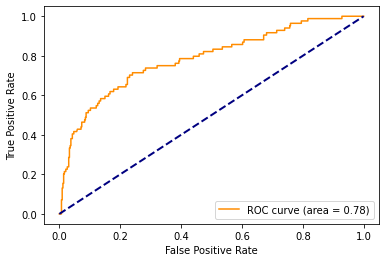

In [55]:
#SVM ROC
#svm  - ROC 
y_probs_svm = clf_svm.predict_proba(X_test) # probability prediction
fpr_svm, tpr_svm, _ = metrics.roc_curve(y_test, y_probs_svm[:,1])
auc_svm = metrics.auc(fpr_svm, tpr_svm)
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', label='ROC curve (area = %0.2f)' %  auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#checking for SVM overfit
y_train_pred = clf_svm.predict(X_train)
print("accuracy=",metrics.accuracy_score(y_train, y_train_pred))
print("sensitivity=",metrics.recall_score(y_train, y_train_pred))
print("precision=" ,metrics.precision_score(y_train, y_train_pred))
pd.DataFrame(metrics.confusion_matrix(y_train, y_train_pred))

## Hyper Parameters for SVM

In [ ]:
C = [0.1, 0.3, 0.5, 0.7, 0.9]

kernel = ['linear', 'poly', 'rbf', 'sigmoid']

probability = [True]

decision_function_shape = ['ovo', 'ovr']

random_grid = { 'C': C,
                'kernel': kernel,
               'probability': probability,
               'decision_function_shape': decision_function_shape}
pprint(random_grid)
clf_svm_random = RandomizedSearchCV(estimator = clf_svm, param_distributions = random_grid, cv = 50,
                               verbose = 2, random_state = 42, n_jobs = -1)

In [ ]:
# fit SVM and looking on best Params
clf_svm_random.fit(X_train, y_train)
clf_svm_random.best_params_

In [ ]:
#SVM Hyper Parameters-Prediction
#svm hyper parameters - predict 
clf_svm_random_y_pred = clf_svm_random.predict(X_test)
clf_svm_random_accuracy = metrics.accuracy_score(y_test, clf_svm_random_y_pred)
clf_svm_sensitivity = metrics.recall_score(y_test, y_pred)
clf_svm_random_precision = metrics.precision_score(y_test, clf_svm_random_y_pred)

print('random model accuracy = {:0.2f}%'.format(clf_svm_random_accuracy*100))
print('random model sensitivity = {:0.2f}%'.format(clf_svm_sensitivity*100))
print('random model precision = {:0.2f}%'.format(clf_svm_random_precision*100))

In [ ]:
#SVM Hyper Parameters-ROC
y_probs_svm_random = clf_svm_random.predict_proba(X_test) # probability prediction
fpr_svm_random, tpr_svm_random, _ = metrics.roc_curve(y_test, y_probs_svm_random[:,1])
auc_svm_random = metrics.auc(fpr_svm_random, tpr_svm_random)
plt.figure()
plt.plot(fpr_svm_random, tpr_svm_random, color='darkorange', label='ROC curve (area = %0.2f)' %  auc_svm_random)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#checking overfit 
y_train_pred = clf_svm_random.predict(X_train)
print("accuracy=",metrics.accuracy_score(y_train, y_train_pred))
print("sensitivity=",metrics.recall_score(y_train, y_train_pred))
print("precision=" ,metrics.precision_score(y_train, y_train_pred))
pd.DataFrame(metrics.confusion_matrix(y_train, y_train_pred))

## AdaBoost classifier

In [50]:
#adaboost fit and predict 
adaBoost = AdaBoostClassifier(random_state=42)
adaBoost.fit(X_train, y_train)
y_pred = adaBoost.predict(X_test)
display(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred)))
print(metrics.classification_report(y_test,y_pred))
print("accuracy=",metrics.accuracy_score(y_test, y_pred))
print("sensitivity=",metrics.recall_score(y_test, y_pred))
print("precision=" ,metrics.precision_score(y_test, y_pred))

,0,1
0,398,22
1,59,25


              precision    recall  f1-score   support

           0       0.87      0.95      0.91       420
           1       0.53      0.30      0.38        84

    accuracy                           0.84       504
   macro avg       0.70      0.62      0.64       504
weighted avg       0.81      0.84      0.82       504

accuracy= 0.8392857142857143
sensitivity= 0.2976190476190476
precision= 0.5319148936170213


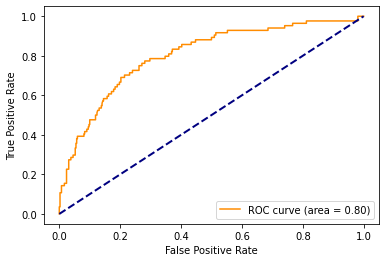

In [52]:
#AdaBoost ROC
y_probs_adaBoost = adaBoost.predict_proba(X_test) # probability prediction
fpr_adaBoost, tpr_adaBoost, _ = metrics.roc_curve(y_test, y_probs_adaBoost[:,1])
auc_adaBoost = metrics.auc(fpr_adaBoost, tpr_adaBoost)
plt.figure()
plt.plot(fpr_adaBoost, tpr_adaBoost, color='darkorange', label='ROC curve (area = %0.2f)' %  auc_adaBoost)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [53]:
#overfir check for adaboost
y_train_pred = adaBoost.predict(X_train)
print("accuracy=",metrics.accuracy_score(y_train, y_train_pred))
print("sensitivity=",metrics.recall_score(y_train, y_train_pred))
print("precision=" ,metrics.precision_score(y_train, y_train_pred))
pd.DataFrame(metrics.confusion_matrix(y_train, y_train_pred))

accuracy= 0.9030612244897959
sensitivity= 0.46060606060606063
precision= 0.7524752475247525


,0,1
0,986,25
1,89,76


### AdaBoost Hyper Parameters

In [ ]:
n_estimators = [10, 20, 25, 30,35, 50, 100, 150, 200,400]
random_grid = {'n_estimators': n_estimators}
pprint(random_grid)
adaBoost_random = RandomizedSearchCV(estimator = clf_adaBoost, param_distributions = random_grid, cv = 10,
                               verbose = 2, random_state = 42, n_jobs = -1)
#fit and finding best parameters
adaBoost_random.fit(X_train, y_train)
adaBoost_random.best_params_

In [ ]:
#AdaBoost Hyper Parameters Predict
y_pred = adaBoost_random.predict(X_test)
display(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred)))
print(metrics.classification_report(y_test,y_pred))
print("accuracy=",metrics.accuracy_score(y_test, y_pred))
print("sensitivity=",metrics.recall_score(y_test, y_pred))
print("precision=" ,metrics.precision_score(y_test, y_pred))

In [ ]:
#AdaBoost Hyper Parameters-ROC
y_probs_adaBoost_random = adaBoost_random.predict_proba(X_test) # probability prediction
fpr_adaBoost_random, tpr_adaBoost_random, _ = metrics.roc_curve(y_test, y_probs_adaBoost_random[:,1])
auc_adaBoost_random = metrics.auc(fpr_adaBoost_random, tpr_adaBoost_random)
plt.figure()
plt.plot(fpr_adaBoost_random, tpr_adaBoost_random, color='darkorange', label='ROC curve (area = %0.2f)' %  auc_adaBoost_random)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()